In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn import metrics

<AxesSubplot:xlabel='X', ylabel='Y'>

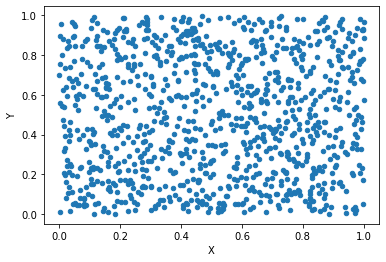

In [2]:
X=np.random.uniform(0,1,1000)
Y=np.random.uniform(0,1,1000)
df_xy=pd.DataFrame(columns=['X','Y'])
df_xy.X=X
df_xy.Y=Y
df_xy.plot(x='X',y='Y',kind='scatter')

In [3]:
airlines=pd.read_csv("D:\zexcelR\EastWestAirlines.csv")

In [4]:
airlines

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
#Normalization Function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
#Normalized DataFrame (considering numerical part of Data)
df_norm=norm_func(airlines.iloc[:,1:])

In [7]:
df_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


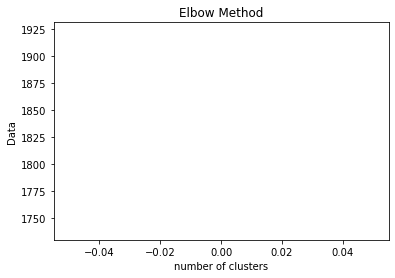

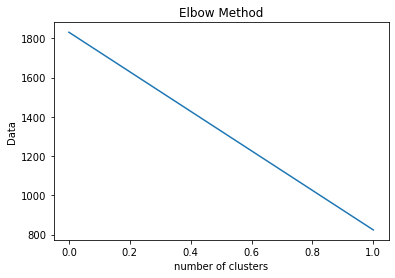

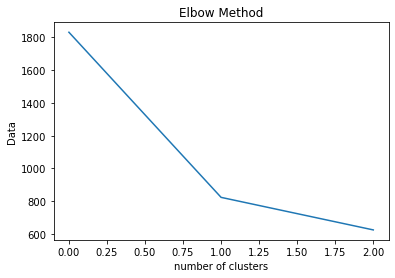

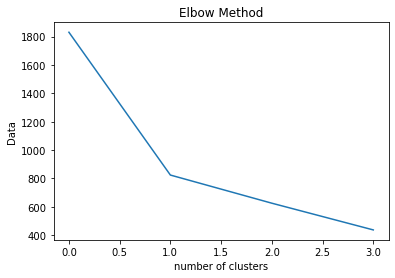

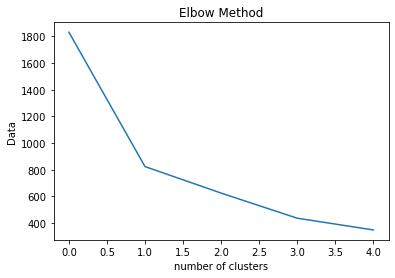

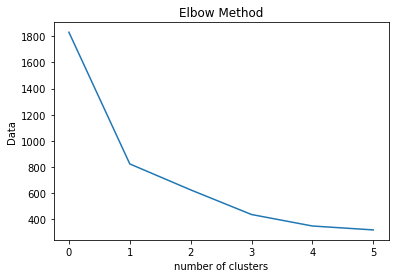

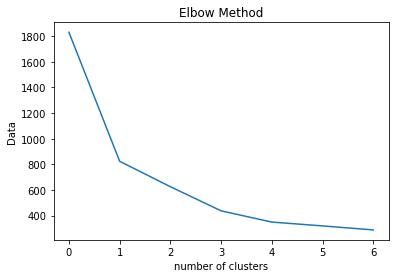

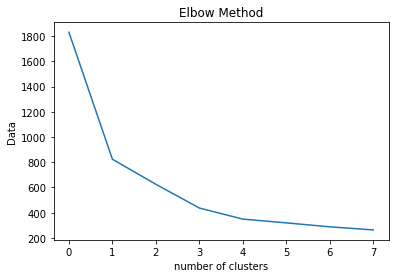

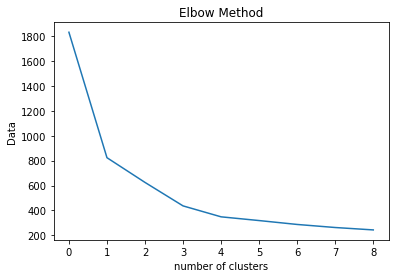

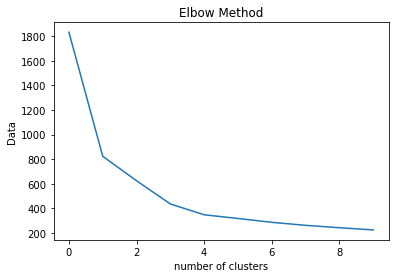

In [8]:
data=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit_transform(df_norm)
    data.append(kmeans.inertia_)
    plt.plot(data)
    plt.title('Elbow Method')
    plt.xlabel('number of clusters')
    plt.ylabel('Data')
    plt.show()

In [9]:
#From above elbow curve the obtained optimal value of k=4
model=KMeans(n_clusters=4)
#fit normalized data
model.fit(df_norm)

KMeans(n_clusters=4)

In [10]:
#converting numpy array to pandas series object
md=pd.Series(model.labels_)
airlines['clust']=md #creating new column & assingning it to new column

In [11]:
#calculate silhoutte score or silhoutte coefficient
silhouetteK=metrics.silhouette_score(df_norm,model.labels_,metric='euclidean')
silhouetteK

0.47483765255961

In [12]:
airlines.iloc[:,1:7].groupby(airlines.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245


In [13]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
